# Simple Beamsteering using Python

In [173]:
import numpy as np
import scipy.constants as const
import scipy.signal.windows as windows
import matplotlib.pyplot as plt

c = const.c
pi = const.pi

# Uniform Linear Array

In [174]:
#Antenna Array Definition
freq = 30e6 #transmit/receiver frequency in Hz
lam = c/freq

dx = lam/2 #meters
Nelements = 14 #number of elements

#Uniform Linear Array
x = np.arange(0, dx*Nelements, dx)
print(x)

[ 0.          4.99654097  9.99308193 14.9896229  19.98616387 24.98270483
 29.9792458  34.97578677 39.97232773 44.9688687  49.96540967 54.96195063
 59.9584916  64.95503257]


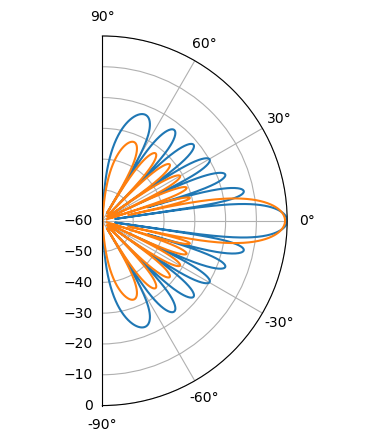

-0.6899044617707474


In [175]:
#Array Factor
azimuthEval = np.arange(-90, 90, 0.1) #angles to evaluate beampattern
k = 2*pi/lam #wave vector assuming plane wave

AF = 0
for n in range(0, Nelements):
    AF += np.exp(1j*k*(n*dx*np.sin(np.deg2rad(azimuthEval))))

#Element Tapering for Sidelobe Response
w = windows.taylor(Nelements, 4, 30, norm=False) #30dB taylor taper
w = w*np.sqrt(Nelements/sum(w**2))
AF_taper = 0
for n in range(0, Nelements):
    AF_taper += w[n]*np.exp(1j*k*(n*dx*np.sin(np.deg2rad(azimuthEval))))

AF_dB = 20*np.log10(abs(AF)/Nelements)
AF_taper_dB = 20*np.log10(abs(AF_taper)/Nelements)


fig = plt.figure() #figure handle
ax = fig.add_subplot(projection='polar') #axes handle
plt.polar(np.deg2rad(azimuthEval), AF_dB)
plt.polar(np.deg2rad(azimuthEval), AF_taper_dB)
ax.set_xlim([-pi/2, pi/2])
ax.set_ylim([-60, 0])

plt.show()

print(AF_taper_dB[901])

# Uniform Circular Array

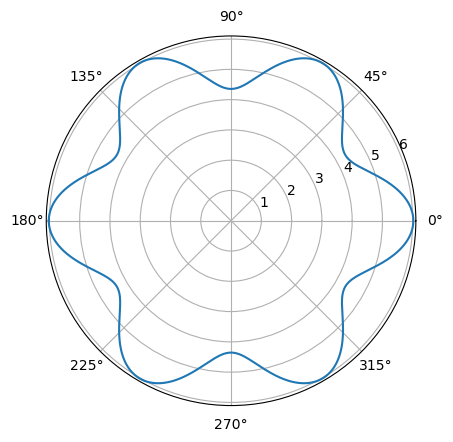

In [176]:
#Antenna Array Definition
radius = 4.5e-2 #meters
freq = 10e3 #transmit/receiver frequency in Hz
lam = c/freq

azimuthEval = np.arange(-180, 180, 0.1) #angles to evaluate beampattern
k = 2*pi/lam #wave vector assuming plane wave

radius = lam/2 #meters
Nelements = 6 #number of elements

AF = 0
for n in range(0, Nelements):
    AF += np.exp(1j*k*radius*(np.cos(np.deg2rad(azimuthEval)-2*pi*n/Nelements)))

AF_dB = 20*np.log10(abs(AF))


fig = plt.figure() #figure handle
ax = fig.add_subplot(projection='polar') #axes handle
plt.polar(np.deg2rad(azimuthEval), AF_dB)
#ax.set_xlim([-pi/2, pi/2])
#ax.set_ylim([-10, 0])

plt.show()